In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/

In [2]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2015.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201908000012015  2015           1          1         1   
1  01-01-01-201908000022015  2015           1          1         1   
2  01-01-01-201908000032015  2015           1          1         1   
3  01-01-01-201908000042015  2015           1          1         1   
4  01-01-01-201908000052015  2015           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000242015  chief judicial magistrate    -9998 unclear   
1  MHNB030000282015  chief judicial magistrate           0 male   
2  MHNB030000272015  chief judicial magistrate           0 male   
3  MHNB030000482015  chief judicial magistrate           0 male   
4  MHNB030000332015  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0          1 female           -9999               0     1978.0        6013.0   
1          1 fem

In [3]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  01-26-19-202702002702015  2015           1         26        19   
900404  01-26-19-202702002712015  2015           1         26        19   
900405  01-26-19-202702002722015  2015           1         26        19   
900406  01-26-19-202702002732015  2015           1         26        19   
900407  01-26-19-202702002742015  2015           1         26        19   
900408  01-26-19-202702002752015  2015           1         26        19   
900409  01-26-19-202702002762015  2015           1         26        19   
900410  01-26-19-202702002772015  2015           1         26        19   
900411  01-26-19-202702002782015  2015           1         26        19   
900412  01-26-19-202702002792015  2015           1         26        19   
900413  01-26-19-202702002802015  2015           1         26        19   
900414  01-26-19-202702002812015  2015           1         26        19   
900415  01-26-19-20270200

In [5]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [6]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [7]:
print(state_x)

[[22, 'Punjab'], [18, 'Chhattisgarh'], [13, 'Uttar Pradesh'], [14, 'Haryana'], [11, 'Orissa'], [16, 'West Bengal'], [4, 'Kerala'], [1, 'Maharashtra'], [10, 'Tamil Nadu'], [21, 'Meghalaya'], [32, 'DNH at Silvasa'], [27, 'Chandigarh'], [17, 'Gujarat'], [3, 'Karnataka'], [8, 'Bihar'], [5, 'Himachal Pradesh'], [25, 'Manipur'], [33, 'Ladakh'], [15, 'Uttarakhand'], [23, 'Madhya Pradesh'], [6, 'Assam'], [7, 'Jharkhand'], [19, 'Mizoram'], [30, 'Goa'], [24, 'Sikkim'], [26, 'Delhi'], [29, 'Telangana'], [31, 'Diu and Daman'], [9, 'Rajasthan'], [12, 'Jammu and Kashmir'], [20, 'Tripura'], [2, 'Andhra Pradesh']]


In [8]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [9]:
print(states)

    state_code              state
0           22             Punjab
1           18       Chhattisgarh
2           13      Uttar Pradesh
3           14            Haryana
4           11             Orissa
5           16        West Bengal
6            4             Kerala
7            1        Maharashtra
8           10         Tamil Nadu
9           21          Meghalaya
10          32     DNH at Silvasa
11          27         Chandigarh
12          17            Gujarat
13           3          Karnataka
14           8              Bihar
15           5   Himachal Pradesh
16          25            Manipur
17          33             Ladakh
18          15        Uttarakhand
19          23     Madhya Pradesh
20           6              Assam
21           7          Jharkhand
22          19            Mizoram
23          30                Goa
24          24             Sikkim
25          26              Delhi
26          29          Telangana
27          31      Diu and Daman
28           9

In [10]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [11]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  01-26-18-203403005632015  2015           1         26        18   
899395  01-26-18-203403005642015  2015           1         26        18   
899396  01-26-18-203403005652015  2015           1         26        18   
899397  01-26-18-203403005662015  2015           1         26        18   
899398  01-26-18-203403005672015  2015           1         26        18   
...                          ...   ...         ...        ...       ...   
899996  01-26-18-203403011662015  2015           1         26        18   
899997  01-26-18-203403011672015  2015           1         26        18   
899998  01-26-18-209200000052015  2015           1         26        18   
899999  01-26-19-200302000012015  2015           1         26        19   
900000  01-26-19-200302000022015  2015           1         26        19   

                    cino                    judge_position female_defendant  \
899394  MHAH06001004

In [12]:
state_count = mer_2.groupby('state').count().reset_index()

In [13]:
print(state_count)

                state  ddl_case_id     year  state_code  dist_code  court_no  \
0      Andhra Pradesh       269049   269049      269049     269049    269049   
1               Assam       155744   155744      155744     155744    155744   
2               Bihar       378305   378305      378305     378305    378305   
3          Chandigarh        29257    29257       29257      29257     29257   
4        Chhattisgarh       162186   162186      162186     162186    162186   
5      DNH at Silvasa         1261     1261        1261       1261      1261   
6               Delhi       209976   209976      209976     209976    209976   
7       Diu and Daman         1581     1581        1581       1581      1581   
8                 Goa        40025    40025       40025      40025     40025   
9             Gujarat       658015   658015      658015     658015    658015   
10            Haryana       507084   507084      507084     507084    507084   
11   Himachal Pradesh       120239   120

In [14]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id     year  state_code  dist_code  \
0           Andhra Pradesh       269049   269049      269049     269049   
1                    Assam       155744   155744      155744     155744   
2                    Bihar       378305   378305      378305     378305   
3               Chandigarh        29257    29257       29257      29257   
4             Chhattisgarh       162186   162186      162186     162186   
5   Dadara & Nagar Havelli         1261     1261        1261       1261   
6             NCT of Delhi       209976   209976      209976     209976   
7              Daman & Diu         1581     1581        1581       1581   
8                      Goa        40025    40025       40025      40025   
9                  Gujarat       658015   658015      658015     658015   
10                 Haryana       507084   507084      507084     507084   
11        Himachal Pradesh       120239   120239      120239     120239   
12         Jammu & Kashmi

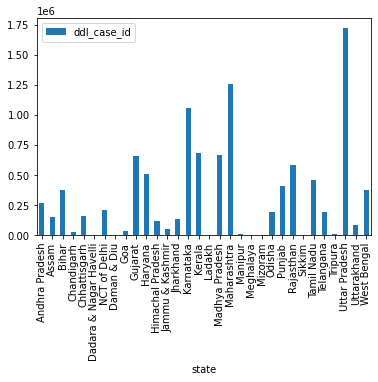

In [15]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2015.png')

In [16]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [17]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

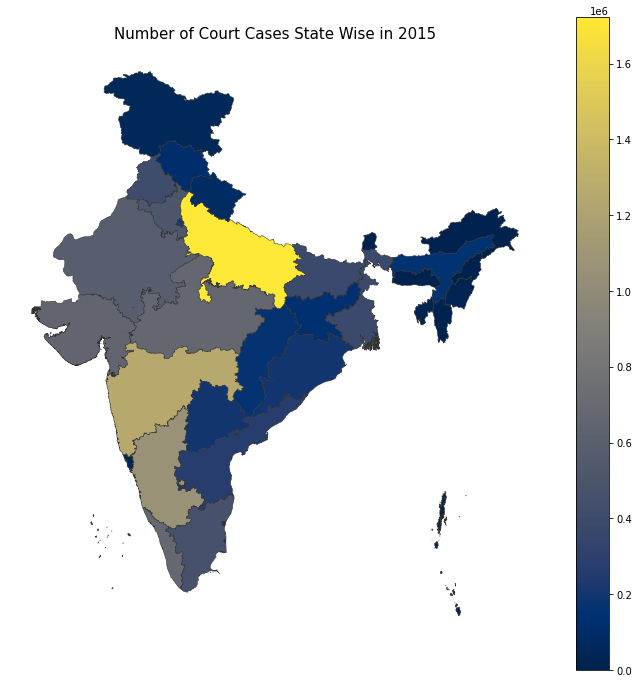

In [21]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2015',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2015.png')

In [19]:
state_2015 = state_map.iloc[:,[1]]
print(state_2015)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                        155744.0
Bihar                        378305.0
Chandigarh                    29257.0
Chhattisgarh                 162186.0
Dadara & Nagar Havelli         1261.0
Daman & Diu                    1581.0
Goa                           40025.0
Gujarat                      658015.0
Haryana                      507084.0
Himachal Pradesh             120239.0
Jammu & Kashmir               50341.0
Jharkhand                    136885.0
Karnataka                   1063633.0
Kerala                       683450.0
Lakshadweep                       0.0
Madhya Pradesh               671773.0
Maharashtra                 1259036.0
Manipur                       14851.0
Meghalaya                      5482.0
Mizoram                        1134.0
Nagaland                          0.0
NCT of Delhi                 209976.0
Puducherry  

In [20]:
state_2015.to_csv('state_2015.csv')